<a href="https://colab.research.google.com/github/Strojove-uceni/23206-final-sign-language-recognition-in-video/blob/main/data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import math
import sys
import cv2
import io

from google.colab import drive

In [2]:
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/SU2/data"

Mounted at /content/drive


In [3]:
df_train = pd.read_csv(path + "/train.csv", sep=",")
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [4]:
df_red = df_train[df_train.participant_id == 2044]

In [9]:
df_red[df_red.sequence_id == 10293515]

,path,participant_id,sequence_id,sign
692,train_landmark_files/2044/10293515.parquet,2044,10293515,all


In [6]:
# for additional_path in df_red.path:

additional_path = "train_landmark_files/2044/10293515.parquet"
df_example = pd.read_parquet(path + "/" + additional_path, engine='pyarrow')
df_example.head()

,frame,row_id,type,landmark_index,x,y,z
0,15,15-face-0,face,0,0.452484,0.485832,-0.039617
1,15,15-face-1,face,1,0.446536,0.450832,-0.060590
2,15,15-face-2,face,2,0.449041,0.462428,-0.036166
3,15,15-face-3,face,3,0.439351,0.425082,-0.038612
4,15,15-face-4,face,4,0.446334,0.441689,-0.062517


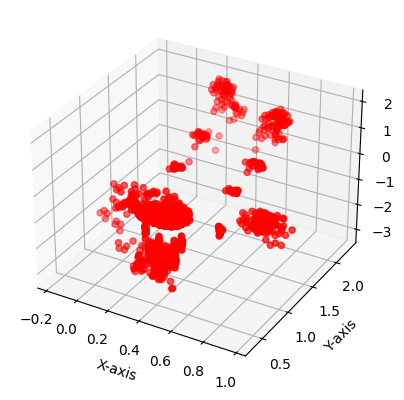

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_example['x'], df_example['y'], df_example['z'], c='r', marker='o') # You can customize the color and marker

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()